In [1]:
!pip install --quiet vit-keras

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from vit_keras import vit

In [3]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 100

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# vit_base_16 Model

In [5]:
vit_base_16 = vit.vit_b16(
        image_size = (32,32),
        activation = 'softmax',
        pretrained = None,
        include_top = False,
        pretrained_top = False,
        classes = 10)

vit_base_16_model = tf.keras.Sequential([
        vit_base_16,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, 'softmax')
    ])

In [6]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

vit_base_16_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [7]:
history1 = vit_base_16_model.fit(x_train, y_train, epochs=50, batch_size=64, 
                                  validation_data=(x_test, y_test))

Epoch 1/50
782/782 [==============================] - 124s 94ms/step - loss: 2.0306 - accuracy: 0.2632 - val_loss: 1.8594 - val_accuracy: 0.3157
Epoch 2/50
782/782 [==============================] - 65s 83ms/step - loss: 1.7880 - accuracy: 0.3532 - val_loss: 1.7221 - val_accuracy: 0.3653
Epoch 3/50
782/782 [==============================] - 65s 83ms/step - loss: 1.8080 - accuracy: 0.3504 - val_loss: 1.6290 - val_accuracy: 0.4108
Epoch 4/50
782/782 [==============================] - 70s 90ms/step - loss: 1.6190 - accuracy: 0.4142 - val_loss: 1.6524 - val_accuracy: 0.4026
Epoch 5/50
782/782 [==============================] - 65s 83ms/step - loss: 1.5562 - accuracy: 0.4405 - val_loss: 1.5113 - val_accuracy: 0.4584
Epoch 6/50
782/782 [==============================] - 69s 88ms/step - loss: 1.4791 - accuracy: 0.4681 - val_loss: 1.4946 - val_accuracy: 0.4649
Epoch 7/50
782/782 [==============================] - 70s 89ms/step - loss: 1.4249 - accuracy: 0.4870 - val_loss: 1.4556 - val_accuracy

In [8]:
vit_base_16_model.save("vit_base_16_model_10.h5")

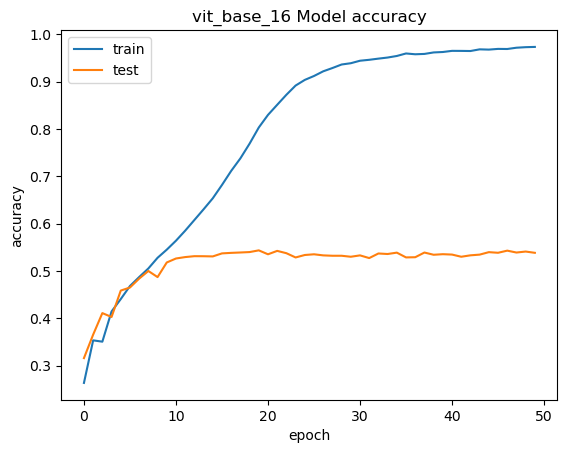

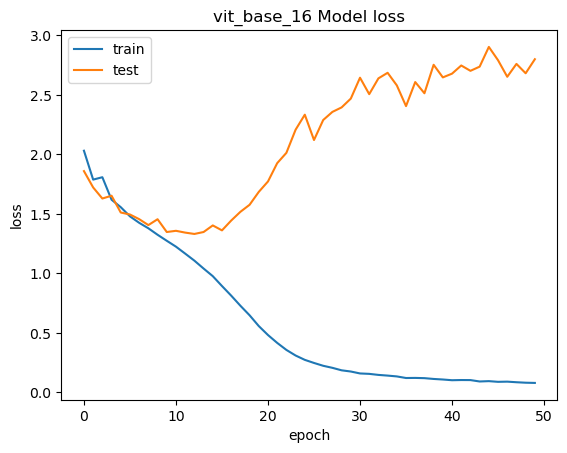

In [9]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('vit_base_16 Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('vit_base_16 Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# vit_b32 Model

In [10]:
vit_base_32 = vit.vit_b32(
        image_size = (32,32),
        activation = 'softmax',
        pretrained = None,
        include_top = False,
        pretrained_top = False,
        classes = 10)

vit_base_32_model = tf.keras.Sequential([
        vit_base_32,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, 'softmax')
    ])

In [11]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

vit_base_32_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [12]:
history2 = vit_base_32_model.fit(x_train, y_train, epochs=50,
                                    batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
782/782 [==============================] - 97s 71ms/step - loss: 2.1245 - accuracy: 0.2278 - val_loss: 1.8229 - val_accuracy: 0.3418
Epoch 2/50
782/782 [==============================] - 50s 64ms/step - loss: 1.7910 - accuracy: 0.3529 - val_loss: 1.7256 - val_accuracy: 0.3717
Epoch 3/50
782/782 [==============================] - 52s 66ms/step - loss: 1.6699 - accuracy: 0.3996 - val_loss: 1.5978 - val_accuracy: 0.4293
Epoch 4/50
782/782 [==============================] - 51s 65ms/step - loss: 1.5908 - accuracy: 0.4273 - val_loss: 1.5847 - val_accuracy: 0.4284
Epoch 5/50
782/782 [==============================] - 53s 68ms/step - loss: 1.5479 - accuracy: 0.4430 - val_loss: 1.5232 - val_accuracy: 0.4574
Epoch 6/50
782/782 [==============================] - 51s 65ms/step - loss: 1.5066 - accuracy: 0.4584 - val_loss: 1.5729 - val_accuracy: 0.4405
Epoch 7/50
782/782 [==============================] - 53s 67ms/step - loss: 1.4718 - accuracy: 0.4681 - val_loss: 1.5875 - val_accuracy:

In [13]:
vit_base_32_model.save("vit_base_32_model_10.h5")

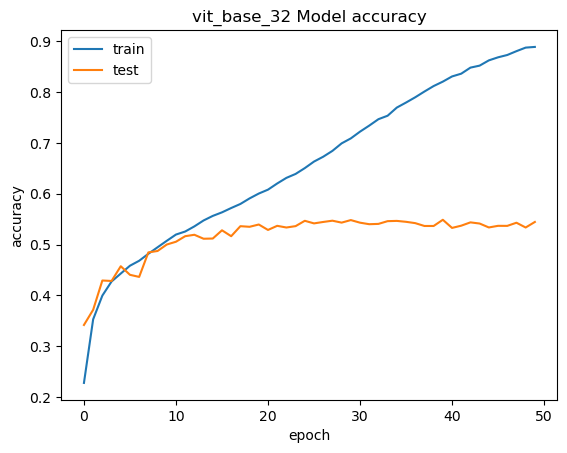

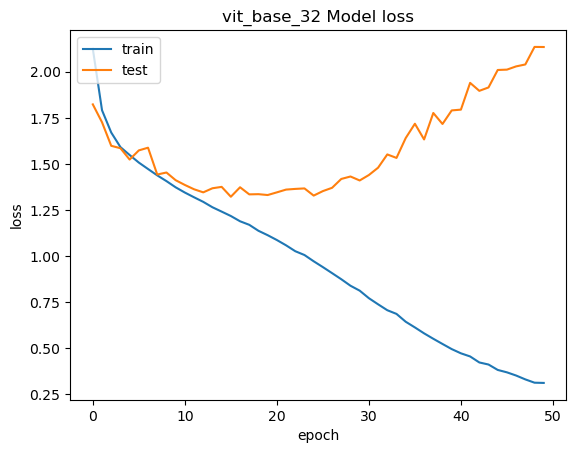

In [14]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('vit_base_32 Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('vit_base_32 Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# vit_b32 Model

In [15]:
vit_large_16 = vit.vit_l16(
        image_size = (32,32),
        activation = 'softmax',
        pretrained = None,
        include_top = False,
        pretrained_top = False,
        classes = 10)

vit_large_16_model = tf.keras.Sequential([
        vit_large_16,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, 'softmax')
    ])

In [16]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

vit_large_16_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [17]:
history3 = vit_large_16_model.fit(x_train, y_train, epochs=50,
                                    batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
782/782 [==============================] - 259s 223ms/step - loss: 2.1891 - accuracy: 0.2100 - val_loss: 1.7580 - val_accuracy: 0.3677
Epoch 2/50
782/782 [==============================] - 169s 216ms/step - loss: 1.7107 - accuracy: 0.3783 - val_loss: 1.6328 - val_accuracy: 0.4087
Epoch 3/50
782/782 [==============================] - 178s 227ms/step - loss: 1.5687 - accuracy: 0.4342 - val_loss: 1.5135 - val_accuracy: 0.4532
Epoch 4/50
782/782 [==============================] - 175s 224ms/step - loss: 1.4885 - accuracy: 0.4664 - val_loss: 1.4964 - val_accuracy: 0.4718
Epoch 5/50
782/782 [==============================] - 177s 226ms/step - loss: 1.4306 - accuracy: 0.4889 - val_loss: 1.4784 - val_accuracy: 0.4736
Epoch 6/50
782/782 [==============================] - 167s 213ms/step - loss: 1.3818 - accuracy: 0.5059 - val_loss: 1.4102 - val_accuracy: 0.4897
Epoch 7/50
782/782 [==============================] - 169s 216ms/step - loss: 1.3306 - accuracy: 0.5253 - val_loss: 1.4029 -

In [18]:
vit_large_16_model.save("vit_large_16_model_10.h5")

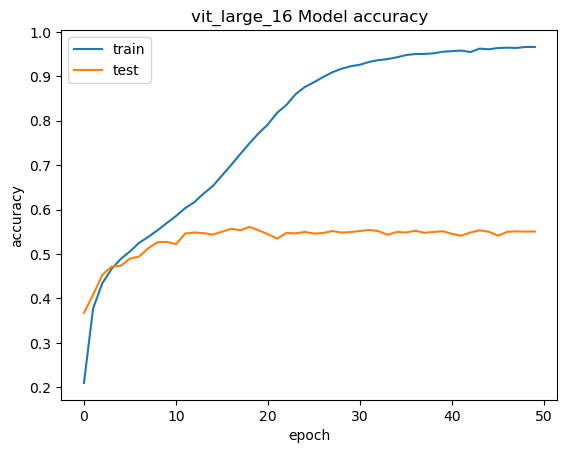

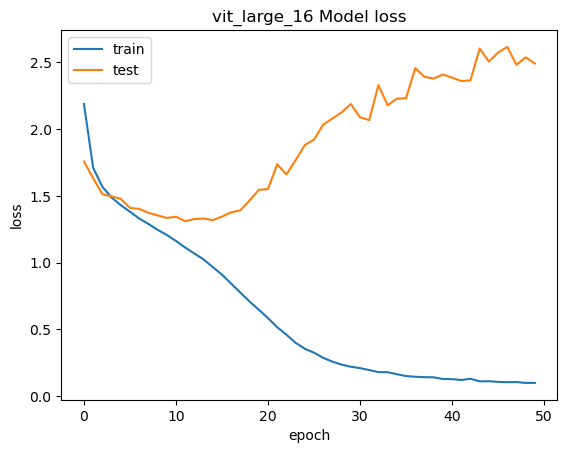

In [19]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('vit_large_16 Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('vit_large_16 Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()